**NESNE YERİ TESPİTİ: YOLO**

In [ ]:
!git clone https://github.com/thtrieu/darkflow

Cloning into 'darkflow'...
remote: Enumerating objects: 2706, done.
remote: Total 2706 (delta 0), reused 0 (delta 0), pack-reused 2706
Receiving objects: 100% (2706/2706), 18.74 MiB | 16.89 MiB/s, done.
Resolving deltas: 100% (1781/1781), done.


In [ ]:
!ls

darkflow  sample_data


In [ ]:
import os
os.chdir("darkflow")

In [ ]:
!ls

cfg	  demo.gif  labels.txt	preview.png  sample_img  test
darkflow  flow	    LICENSE	README.md    setup.py


In [ ]:
!ls cfg

coco.names	extraction.conv.cfg  tiny-yolo.cfg	v1    yolo.cfg
extraction.cfg	tiny-yolo-4c.cfg     tiny-yolo-voc.cfg	v1.1  yolo-voc.cfg


In [ ]:
!pip3 install Cython h5py

    100% |████████████████████████████████| 2.1MB 9.0MB/s 


In [ ]:
!python3 setup.py build_ext --inplace

Compiling darkflow/cython_utils/nms.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo2_findboxes.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo_findboxes.pyx because it changed.
[1/3] Cythonizing darkflow/cython_utils/cy_yolo2_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo2_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/3] Cythonizing darkflow/cython_utils/cy_yolo_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[3/3] Cythonizing darkflow/cython_utils/nms.pyx
/usr/

In [ ]:
!pip3 install -e .

Obtaining file:///content/darkflow
  Running setup.py develop for darkflow


In [ ]:
!mkdir bin

In [ ]:
!wget https://pjreddie.com/media/files/yolo.weights -P bin/

--2018-12-07 07:43:28--  https://pjreddie.com/media/files/yolo.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘bin/yolo.weights’

yolo.weights        100%[===================>] 194.49M  22.3MB/s    in 9.5s    

2018-12-07 07:43:38 (20.5 MB/s) - ‘bin/yolo.weights’ saved [203934260/203934260]



In [ ]:
!ls bin/

yolo.weights


**UYGULAMA**

In [ ]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python


In [ ]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

from keras.preprocessing import image

%config InlineBackend.figure_format = 'svg'

Using TensorFlow backend.


In [ ]:
# define the model options and run
options = {
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolo.weights',
    'threshold': 0.3,
    'gpu': 0
}

tfnet = TFNet(options)


Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.03165602684020996s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package libfuse2:amd64.
(Reading database ... 26397 files and directories currently installed.)
Preparing to unpack .../libfuse2_2.9.7-1ubuntu1_amd64.deb ...
Unpacking libfuse2:amd64 (2.9.7-1ubuntu1) ...
Selecting previously unselected package fuse.
Preparing to unpack .../fuse_2.9.7-1ubuntu1_amd64.deb ...
Unpacking fuse (2.9.7-1ubuntu1) ...
Selecting previously unselected package google-drive-ocamlfuse.
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu2~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu2~ubuntu18.04.1) ...
Setting up libfuse2:amd64 (2.9.7-1ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Setting up fuse (2.9.7-1ubuntu1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu2~ubuntu18.04.1) ...
Please, open the following URL in a web browser: https://accounts.google

In [ ]:
os.chdir("../")

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls

adc.json  darkflow  drive  sample_data


In [ ]:
os.chdir("darkflow")

In [ ]:
!ls '../drive/COLAB/YOLO_NesneYeriTespiti/images'

insan.jpg  istiklal.jpg


In [ ]:
# read the color image and covert to RGB

test_image = '../drive/COLAB/YOLO_NesneYeriTespiti/images/insan.jpg'
test_image2 = '../drive/COLAB/YOLO_NesneYeriTespiti/images/istiklal.jpg'

img = cv2.imread(test_image, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


img.shape

(424, 640, 3)

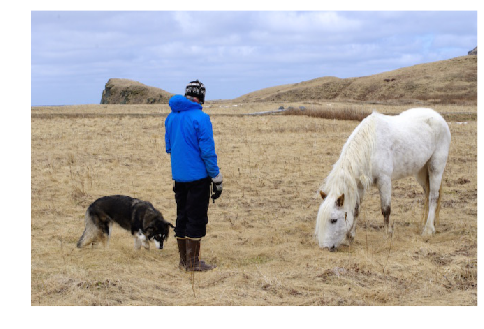

In [ ]:
predicted_image = image.load_img(test_image)

plt.axis('off')
plt.imshow(predicted_image)
plt.show()

In [ ]:
# use YOLO to predict the image
result = tfnet.return_predict(img)
result

[{'bottomright': {'x': 271, 'y': 375},
  'confidence': 0.833129,
  'label': 'person',
  'topleft': {'x': 187, 'y': 103}},
 {'bottomright': {'x': 205, 'y': 354},
  'confidence': 0.8508311,
  'label': 'dog',
  'topleft': {'x': 69, 'y': 259}},
 {'bottomright': {'x': 606, 'y': 352},
  'confidence': 0.8790006,
  'label': 'horse',
  'topleft': {'x': 397, 'y': 127}}]

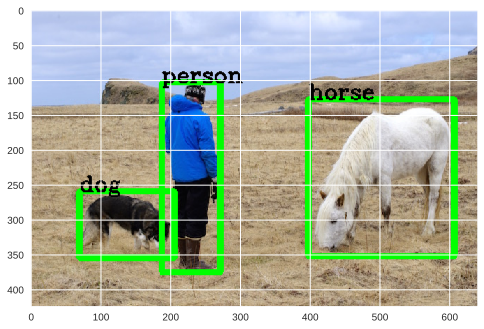

In [ ]:
# pull out some info from the results

for r in result:
  tl = (r['topleft']['x'], r['topleft']['y'])
  br = (r['bottomright']['x'], r['bottomright']['y'])
  label = r['label']


  # add the box and label and display it
  img = cv2.rectangle(img, tl, br, (0, 255, 0), 7)
  img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)

  
plt.imshow(img)
plt.show()